<a href="https://colab.research.google.com/github/codewithsrs/app-data-analysis/blob/main/playstore_app_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

We imported the necessary libraries that can be needed for our EDA.

**Lets read the file as play_df and reviews_df for play_store data and user_reviews data**

In [2]:
play_df = pd.read_csv("/content/drive/MyDrive/Copy of Play Store Data.csv")
reviews_df = pd.read_csv("/content/drive/MyDrive/Copy of User Reviews.csv")

In [3]:
play_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [4]:
reviews_df.head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462


In [5]:
#lets drop nan values from reviews dataframe which have no reviews
reviews_df.drop(reviews_df[reviews_df['Translated_Review'].isna()].index,inplace=True)
reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [6]:
#Lets merge two dataframes
combined_df = pd.merge(play_df,reviews_df,how='inner',left_on='App',right_on='App')
combined_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333


In [7]:
combined_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [8]:
combined_df.drop(play_df[play_df['Category']=='1.9'].index,inplace = True)

**Data Preprocessing**

so in the size column we can see we have values with M and K so lets replace them with their equivalent value with respect to k and convert into float

In [9]:
combined_df['Size']=combined_df['Size'].str.replace('M','000')
combined_df['Size']=combined_df['Size'].str.replace('k','')
#apps['size']=apps['size'].str.replace('.','')
combined_df['Size']=combined_df['Size'].replace("Varies with device",np.nan)
combined_df['Size']=combined_df['Size'].astype('float')
combined_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


now lets clean the Installs and Price columns as these have +, ',' ,$ present which can be treated as string. Then we will convert the last updated column to date format

In [10]:
combined_df['Installs'] = combined_df['Installs'].str.replace('+','')
combined_df['Installs'] = combined_df['Installs'].str.replace(',','')
combined_df['Installs'] = combined_df['Installs'].astype(int)
combined_df['Reviews'] = combined_df['Reviews'].astype(int)
combined_df['Price'] = combined_df['Price'].str.replace('$','')
combined_df['Price'] = combined_df['Price'].astype(float)
combined_df['Last Updated'] = pd.to_datetime(combined_df['Last Updated'])
combined_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333


In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72604 entries, 0 to 72604
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     72604 non-null  object        
 1   Category                72604 non-null  object        
 2   Rating                  72565 non-null  float64       
 3   Reviews                 72604 non-null  int64         
 4   Size                    45046 non-null  float64       
 5   Installs                72604 non-null  int64         
 6   Type                    72604 non-null  object        
 7   Price                   72604 non-null  float64       
 8   Content Rating          72604 non-null  object        
 9   Genres                  72604 non-null  object        
 10  Last Updated            72604 non-null  datetime64[ns]
 11  Current Ver             72604 non-null  object        
 12  Android Ver             72604 non-null  object

**We have the question to find out the average rating of the paid apps and free apps and compare them**

In [12]:
combined_df.groupby('Type')['Rating'].mean()

Type
Free    4.333639
Paid    4.333376
Name: Rating, dtype: float64

We saw the result that the average rating of free and paid apps are very close and yet the average rating of free apps is more . So we can say free apps are performing well

**Can we find the percentage of involvement of audience in each app and compare every category. Okay lets check**

In [13]:
#lets first install a new column named involvement and we will calculate involvement as (total install-no. of reviews)/total installs
#lets define a function
def involvement():
  return (combined_df['Installs']-combined_df['Reviews'])/combined_df['Installs']
#lets apply it to the columns
combined_df['involvement'] = involvement()
combined_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,involvement
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,0.998066
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333,0.998066


**Now lets check which app category has more audience involvement. we will do this by grouping the category and finding the average involvement**

In [14]:
involvement_df = combined_df.groupby('Category')['involvement'].mean().reset_index()

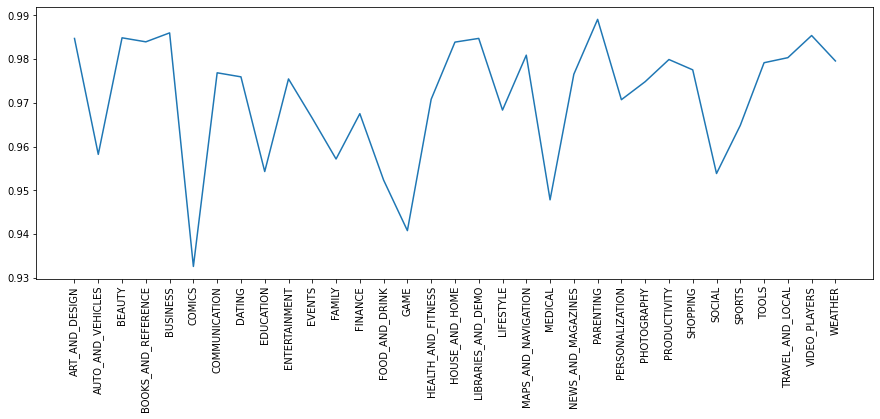

In [45]:
plt.figure(figsize = (15,5))
plt.plot(involvement_df['Category'],involvement_df['involvement'])
plt.xticks(rotation = '90')
plt.show()

Lets Check the data by setting the Y axis from 0 to 1.00 so that  we can check the data correctly

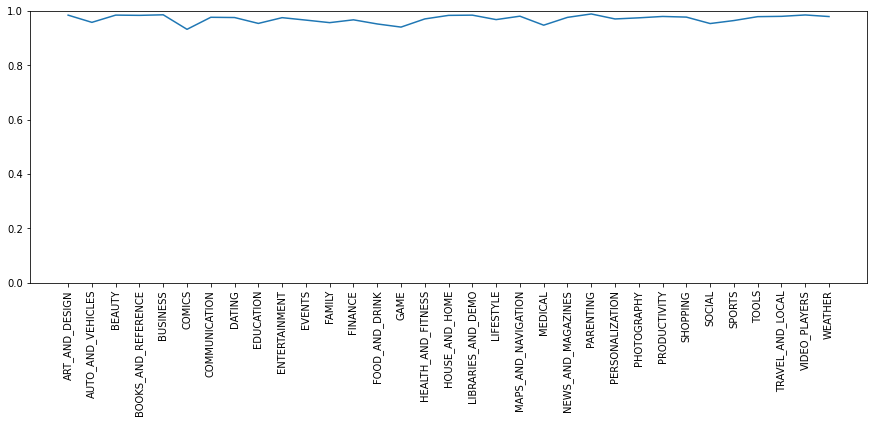

In [44]:
plt.figure(figsize = (15,5))
plt.plot(involvement_df['Category'],involvement_df['involvement'])
plt.ylim(0,1.00)
plt.xticks(rotation = '90')
plt.show()

**Now lets check the number of paid apps and number of free apps to total apps**

In [16]:
#we have one index missing from the dataframe so lets reset and drop the old index column
combined_df.reset_index(inplace=True)
combined_df.drop(['index'],inplace = True,axis = 1)

<BarContainer object of 3 artists>

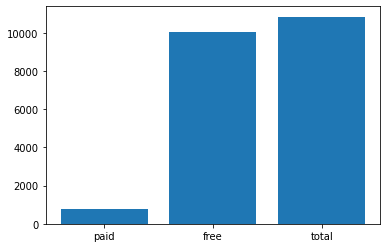

In [17]:
paid_list=[]
free_list = []
total_list = [i for i in play_df['App']]
for i in range(len(play_df['Type'])):
  if play_df['Type'][i]=='Paid':
    paid_list.append(play_df['App'][i])
  if play_df['Type'][i]=='Free':
    free_list.append(play_df['App'][i])
  else:
    continue

p = len(paid_list)
q = len(free_list)
r = len(total_list)
    
name = ('paid','free','total')
values = (p,q,r)
plt.bar(name,values)

**Sentiment polarity is the inclination of positivity or negativity so lets see whats the average sentiment polarity per category**

In [68]:
combined_df.groupby('Category')['Sentiment_Polarity'].mean().reset_index()

,Category,Sentiment_Polarity
0,ART_AND_DESIGN,0.234735
1,AUTO_AND_VEHICLES,0.348683
2,BEAUTY,0.193360
3,BOOKS_AND_REFERENCE,0.226526
4,BUSINESS,0.247749
5,COMICS,0.468482
6,COMMUNICATION,0.182965
7,DATING,0.164817
8,EDUCATION,0.251392
9,ENTERTAINMENT,0.133400


So we can see here highest positivity is for comics and lowest positivity is for games. So may be comics apps are more enjoyble than the Games 

**May be we can get it better by plotting a simple line chart**

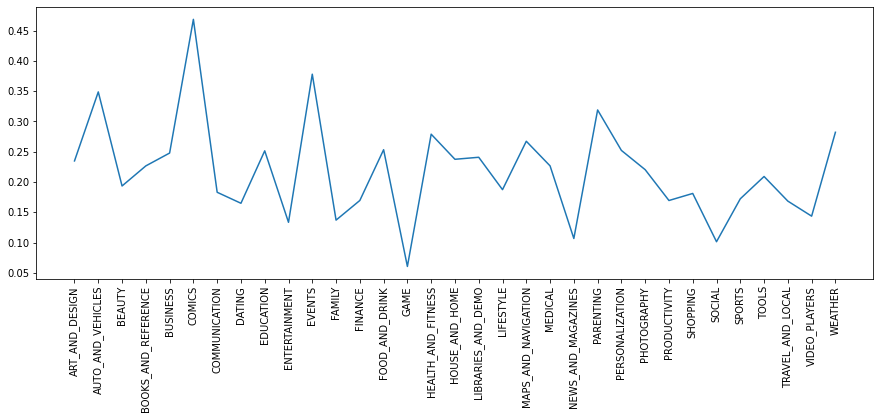

In [69]:
x = sorted([i for i in combined_df['Category'].unique()])
y = [i for i in combined_df.groupby('Category')['Sentiment_Polarity'].mean()]
plt.figure(figsize=(15,5))
plt.xticks(rotation = 90)
plt.plot(x,y)
plt.show()

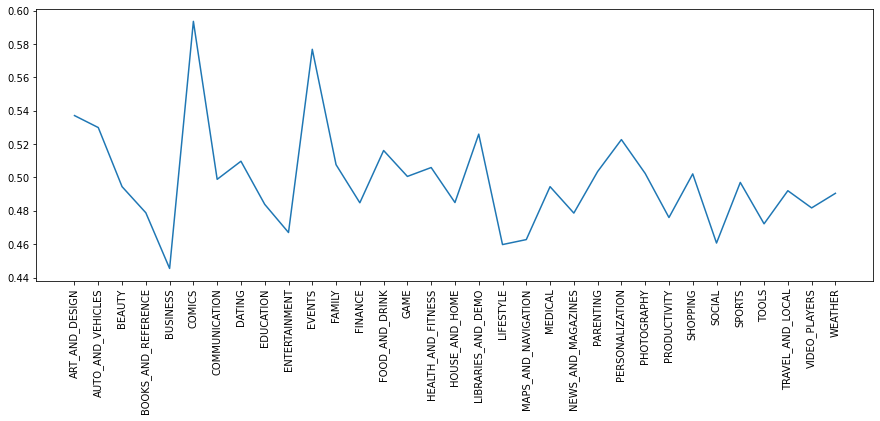

In [70]:
z = [i for i in combined_df.groupby('Category')['Sentiment_Subjectivity'].mean()]
x = sorted([i for i in combined_df['Category'].unique()])
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.plot(x,z)
plt.show()

So from the above we can see that comics and events categories have more subjectivity than the game category that means comics and events categories have more opinion based reviews than games.

**Sentiment polarity indicates how much a review is inclined to positivity or negativity and sentiment subjectivity indicates how much factual or emotional that review is. So lets see if there is any co relation between two**

In [21]:
sentiment_df = combined_df[['Sentiment_Polarity','Sentiment_Subjectivity']].dropna()
sentiment_df

,Sentiment_Polarity,Sentiment_Subjectivity
0,-0.250000,1.000000
1,-0.725000,0.833333
2,0.000000,0.000000
3,0.500000,0.600000
4,-0.800000,0.900000
...,...,...
72599,0.475000,0.512500
72600,0.566667,0.733333
72601,0.200000,0.200000
72602,0.000000,0.000000


In [22]:
sentiment_df.corr()

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.227487
Sentiment_Subjectivity,0.227487,1.000000


As we can see here we have a positive co-relation but not very much so we cant say what can be the sentiment subjectivity by looking at the sentiment polarity alone.

**Lets create box plots for two sentiment polarity and sentiment subjectivity to know where most of the values lie**

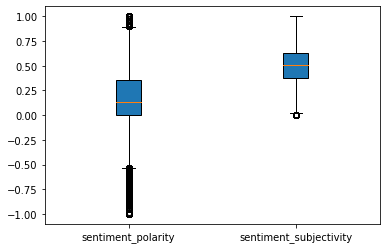

In [23]:
x = [i for i in sentiment_df['Sentiment_Polarity']]
y = [i for i in sentiment_df['Sentiment_Subjectivity']]
plt.boxplot((x,y),patch_artist=True,labels = ['sentiment_polarity','sentiment_subjectivity'])
plt.show()

**Lets see which category have how much positiveness and negativeness by comparing the sentiment with the category**

In [24]:
#first lets make a dataframe by cleaning the na values in sentiment column from combined_df
sentiment_category_df = combined_df[['Category','Sentiment']].dropna()
sentiment_category_df

,Category,Sentiment
0,ART_AND_DESIGN,Negative
1,ART_AND_DESIGN,Negative
2,ART_AND_DESIGN,Neutral
3,ART_AND_DESIGN,Positive
4,ART_AND_DESIGN,Negative
...,...,...
72599,PHOTOGRAPHY,Positive
72600,PHOTOGRAPHY,Positive
72601,PHOTOGRAPHY,Positive
72602,PHOTOGRAPHY,Neutral


In [25]:
#lets create a completely new dataframe by grouping the category and sentiment
new_df = sentiment_category_df.groupby(['Sentiment','Category']).size().to_frame(name = 'count').reset_index()
new_df

,Sentiment,Category,count
0,Negative,ART_AND_DESIGN,61
1,Negative,AUTO_AND_VEHICLES,17
2,Negative,BEAUTY,65
3,Negative,BOOKS_AND_REFERENCE,134
4,Negative,BUSINESS,342
...,...,...,...
94,Positive,SPORTS,2201
95,Positive,TOOLS,1090
96,Positive,TRAVEL_AND_LOCAL,1824
97,Positive,VIDEO_PLAYERS,190


In [26]:
#now lets make a pivot to see which category has how much positive,negative and neutral reviews
pivotted_new_df = new_df.pivot(index='Category',columns='Sentiment',values='count')
pivotted_new_df

Sentiment,Negative,Neutral,Positive
Category,,,
ART_AND_DESIGN,61,62,259
AUTO_AND_VEHICLES,17,36,236
BEAUTY,65,88,185
BOOKS_AND_REFERENCE,134,130,551
BUSINESS,342,555,1450
COMICS,2,6,72
COMMUNICATION,372,285,1292
DATING,697,530,1971
EDUCATION,216,132,1346


In [27]:
#lets find out most negative reviewed category
pivotted_new_df[pivotted_new_df['Negative']==pivotted_new_df['Negative'].max()]

Sentiment,Negative,Neutral,Positive
Category,,,
GAME,7270,814,11041


In [28]:
#lets find out most positive reviewed category
pivotted_new_df[pivotted_new_df['Positive']==pivotted_new_df['Positive'].max()]

Sentiment,Negative,Neutral,Positive
Category,,,
GAME,7270,814,11041


In [29]:
#lets find minimum number of negative reviewed Category
pivotted_new_df[pivotted_new_df['Negative']==pivotted_new_df['Negative'].min()]

Sentiment,Negative,Neutral,Positive
Category,,,
COMICS,2,6,72


In [30]:
#lets find minimum number of positive reviewed Category
pivotted_new_df[pivotted_new_df['Positive']==pivotted_new_df['Positive'].min()]

Sentiment,Negative,Neutral,Positive
Category,,,
COMICS,2,6,72


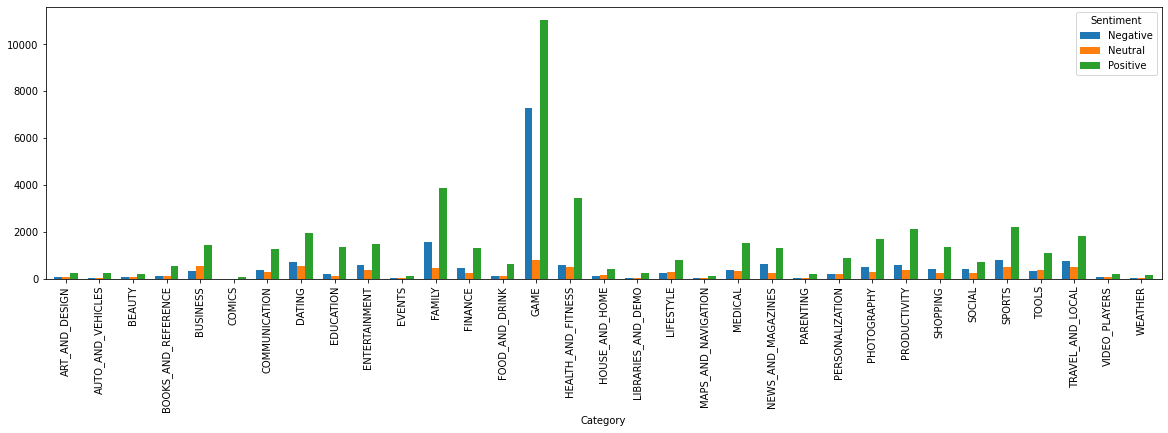

In [31]:
#lets plot the pivot
pivotted_new_df.plot(kind = 'bar',figsize = (20,5), width =0.7)
plt.xticks(rotation = 90)
plt.show()

**Lets see which category is popular among the teens and we will do this by selecting the content rating which specifies teen and grouping by category then taking the average installs**

In [32]:
teen_df = combined_df[combined_df['Content Rating']=='Teen'].groupby('Category').agg({'Installs':'mean'}).astype(int).reset_index()
teen_df

,Category,Installs
0,AUTO_AND_VEHICLES,10000000
1,BOOKS_AND_REFERENCE,100000000
2,COMICS,876250
3,DATING,1000000
4,ENTERTAINMENT,5639919
5,EVENTS,100000
6,FAMILY,23007640
7,FOOD_AND_DRINK,4809523
8,GAME,46558481
9,HEALTH_AND_FITNESS,675675


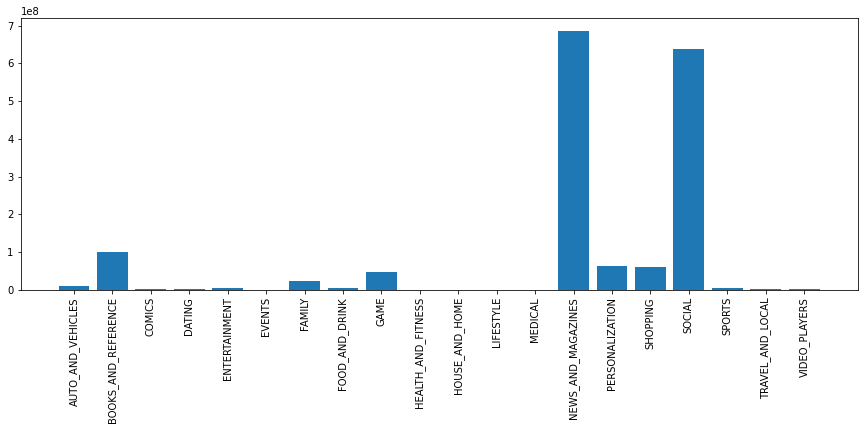

In [71]:
plt.figure(figsize=(15,5))
plt.bar(teen_df['Category'],teen_df['Installs'])
plt.xticks(rotation = '90')
plt.show()

So here we saw an ineresting result that when we consider average install we find two categories are dominating they are 'news and magazines' and 'social'

Lets see the result by considering the total number of installs

In [34]:
teen_df1 = combined_df[combined_df['Content Rating']=='Teen'].groupby('Category').agg({'Installs':'sum'}).astype(int).reset_index()

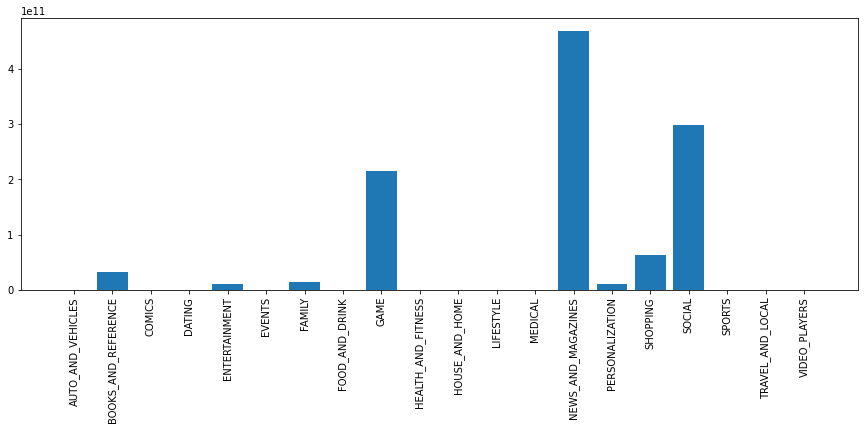

In [72]:
plt.figure(figsize=(15,5))
plt.bar(teen_df1['Category'],teen_df1['Installs'])
plt.xticks(rotation = '90')
plt.show()

**So we saw we have three popular categies among the teens from above analysis. in two categories the genres are same but in Game category there are multiple genres so lets see which genre in game is mostly downloaded by the teens**

In [81]:
#Lets filter by content rating and category then group by genres and taking the average installs per genre 
game_df = combined_df[(combined_df['Content Rating']=='Teen') & (combined_df['Category']=='GAME')].groupby('Genres')['Installs'].mean().reset_index()
game_df['Installs'] = game_df['Installs'].astype(int)
game_df

,Genres,Installs
0,Action,49275752
1,Adventure,10000000
2,Arcade,50000000
3,Puzzle,10000000
4,Racing,100000000
5,Role Playing,3134328
6,Simulation,37705627
7,Strategy,1000000


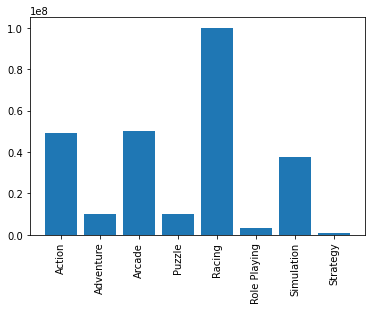

In [89]:
#lets plot the above df
plt.bar(game_df['Genres'],game_df['Installs'])
plt.xticks(rotation = '90')
plt.show()

In [38]:
combined_df.groupby('Content Rating')['Content Rating'].count()

Content Rating
Adults only 18+       36
Everyone           54394
Everyone 10+        3040
Mature 17+          4480
Teen               10654
Name: Content Rating, dtype: int64

**We can see from above we have next highest as mature 17+ so lets say whats most popular in 17+**

In [39]:
mature_df1 = combined_df[combined_df['Content Rating']=='Mature 17+'].groupby('Category').agg({'Installs':'mean'}).astype(int).reset_index()
mature_df1

,Category,Installs
0,BEAUTY,100000
1,COMMUNICATION,50000000
2,DATING,1184386
3,ENTERTAINMENT,10000000
4,GAME,43534722
5,MEDICAL,50000
6,NEWS_AND_MAGAZINES,1000000
7,PERSONALIZATION,100000
8,PHOTOGRAPHY,10000000
9,SOCIAL,80555371


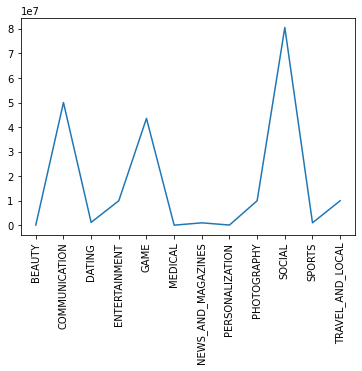

In [40]:
#lets plot these
plt.plot(mature_df1['Category'],mature_df1['Installs'])
plt.xticks(rotation = '90')
plt.show()

In [41]:
combined_df[combined_df['Category']=='COMMUNICATION'].groupby('Genres')['Genres'].count()

Genres
Communication    1949
Name: Genres, dtype: int64

In [42]:
combined_df[combined_df['Category']=='SOCIAL'].groupby('Genres')['Genres'].count()

Genres
Social    1398
Name: Genres, dtype: int64

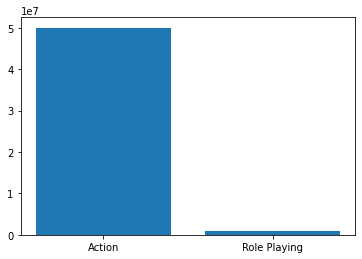

In [43]:
mature_game_df = combined_df[(combined_df['Category']=='GAME') & (combined_df['Content Rating']=='Mature 17+')]
grouped_df = mature_game_df[mature_game_df['Content Rating']=='Mature 17+'].groupby('Genres')['Installs'].mean().reset_index()
#lets plot the dataframe
plt.bar(grouped_df['Genres'],grouped_df['Installs'])
plt.show()


*We can clearly see that among 17+ people mostly social,communication and game category is popular and in the game category Action is most popular*